## HR Promotion Prediction:


> HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.
> ##### You can find the original datast [here](https://www.kaggle.com/bhrt97/hr-analytics-classification?select=train_LZdllcl.csv)
### Table of Contents
<ul>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#predict">Prediction model</a></li>
</ul>

<a id='assess'></a>
## Data Assessment:

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as lr

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading our dataset and assessing it
train_df = pd.read_csv('train_data.csv')

train_df.sample(5)

,id,department,education,gender,trainings,age,prev_year_rating,experience,KPI_80,awards_won,avg_training_score,promoted
236,71339,Technology,Bachelor's,m,1,35,3.0,8,0,0,78,0
10147,42506,Sales & Marketing,Master's & above,m,1,37,3.0,4,0,0,49,0
24055,68505,Technology,Bachelor's,f,1,40,3.0,11,0,0,77,0
22662,68626,Sales & Marketing,NaN,m,4,24,NaN,1,0,0,51,0
42128,55995,Procurement,Bachelor's,f,1,31,5.0,5,0,0,72,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54808 non-null  int64  
 1   department          54808 non-null  object 
 2   education           52399 non-null  object 
 3   gender              54808 non-null  object 
 4   trainings           54808 non-null  int64  
 5   age                 54808 non-null  int64  
 6   prev_year_rating    50684 non-null  float64
 7   experience          54808 non-null  int64  
 8   KPI_80              54808 non-null  int64  
 9   awards_won          54808 non-null  int64  
 10  avg_training_score  54808 non-null  int64  
 11  promoted            54808 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 5.0+ MB


In [4]:
train_df.describe()

,id,trainings,age,prev_year_rating,experience,KPI_80,awards_won,avg_training_score,promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


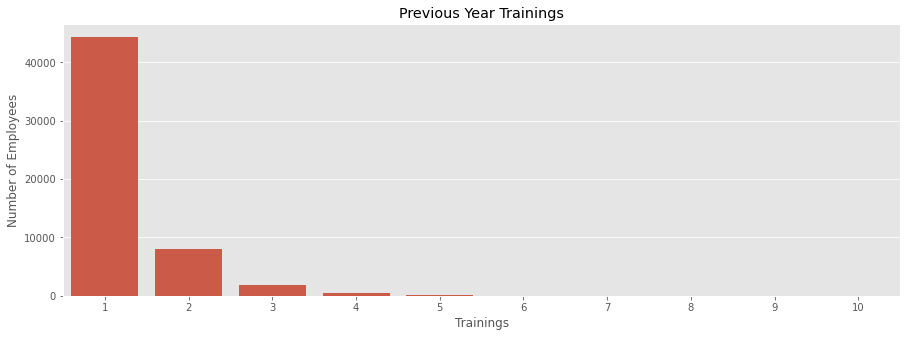

In [5]:
#styling the visualization
plt.style.use("ggplot")
base_color = sns.color_palette()[0]
plt.figure(figsize=(15,5))

# previous year trainings distrbution
trainings_count = train_df.trainings.value_counts()

sns.barplot( x = trainings_count.index, y = trainings_count, color = base_color)
plt.xlabel('Trainings')
plt.ylabel('Number of Employees')
plt.title('Previous Year Trainings')

plt.tight_layout;

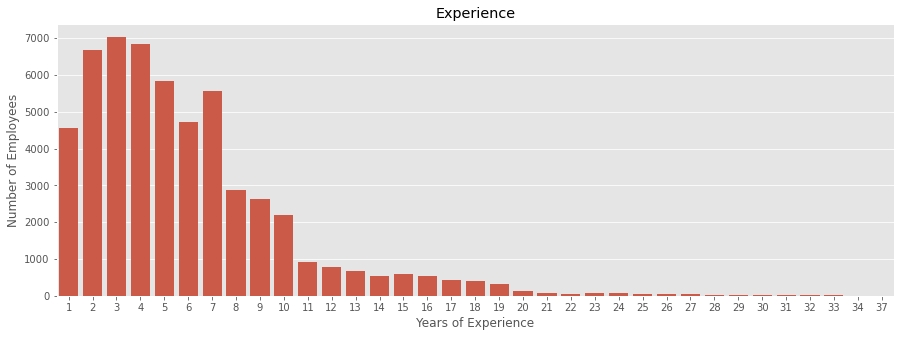

In [6]:
# experience distrbution
plt.figure(figsize=(15,5))

experience_count = train_df.experience.value_counts()

sns.barplot( x = experience_count.index, y = experience_count, color = base_color)
plt.title('Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Employees');

In [7]:
train_df.duplicated().sum()

0

## Quality Issues:
* outliers in trainings and experience columns.
* nulls in education and prev_year_rating columns.

<a id='clean'></a>
## Data Cleaning:

In [8]:
# make a copy of the original data
clean_train = train_df.copy()

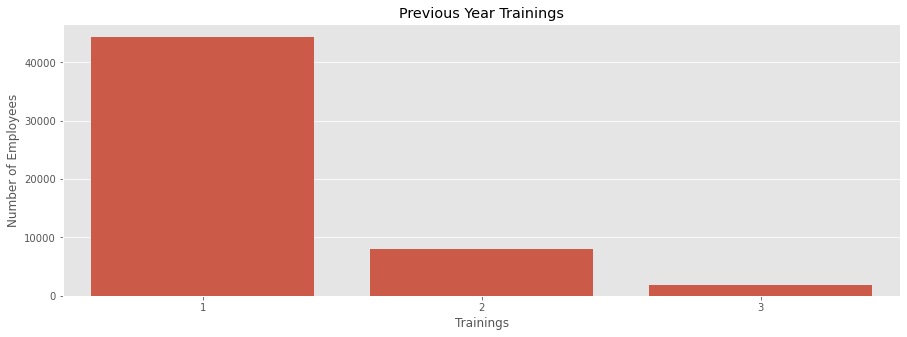

In [9]:
#Removing outliers from trainings
trainings_quantile = clean_train.trainings.quantile(0.99)
clean_train = clean_train[(clean_train.trainings < trainings_quantile)]

#testing
plt.figure(figsize=(15,5))

trainings_count = clean_train.trainings.value_counts()

sns.barplot( x = trainings_count.index, y = trainings_count, color = base_color)
plt.xlabel('Trainings')
plt.ylabel('Number of Employees')
plt.title('Previous Year Trainings');

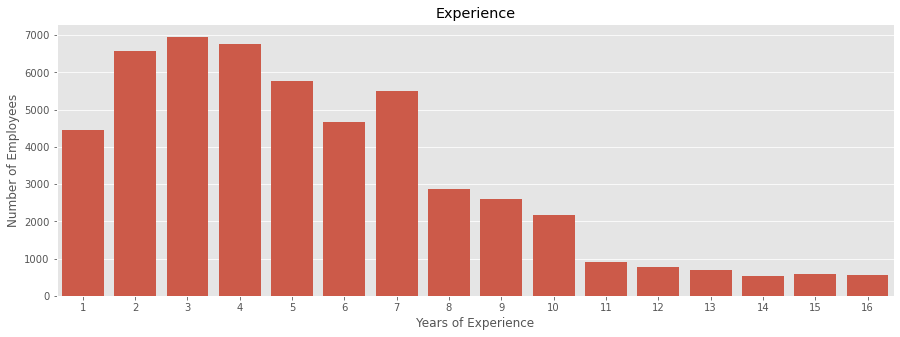

In [10]:
#Removing outliers from trainings
experience_quantile = clean_train.experience.quantile(0.97)
clean_train = clean_train[(clean_train.experience < experience_quantile)]

#testing
plt.figure(figsize=(15,5))

experience_count = clean_train.experience.value_counts()

sns.barplot( x = experience_count.index, y = experience_count, color = base_color)
plt.title('Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Employees');

In [12]:
#replacing the nulls in prev_year_rating with median
Imputed_ratings = SimpleImputer(strategy = 'median').fit(clean_train[['prev_year_rating']])
clean_train.prev_year_rating = Imputed_ratings.transform(clean_train[['prev_year_rating']])

#testing
clean_train.prev_year_rating.isnull().sum()

0

In [13]:
#replacing the nulls in education with most frequent value
Imputed_edu = SimpleImputer(strategy = 'most_frequent').fit(clean_train[['education']])
clean_train.education = Imputed_edu.transform(clean_train[['education']])

#testing
clean_train.education.isnull().sum()

0

In [14]:
# final touch ✨
clean_train.reset_index(drop = True, inplace = True)

# Storing the final dataset
clean_train.to_csv('clean_train.csv', index = False)

<a id='predict'></a>
## Prediction models:

In [15]:
#preprocessing:
final_df = clean_train.copy()

# encoding categorical variables
dummies_data = pd.get_dummies(final_df[['department', 'gender']])
final_df['education'].replace({"Below Secondary": 1, "Bachelor's": 2, "Master's & above": 3}, inplace = True)

# adding converted columns
final_df = pd.concat([final_df,dummies_data], axis = 'columns')

# droping old categorical columns
final_df.drop(columns = ['id', 'gender', 'department'], inplace = True)

# testing
final_df.sample(5)

,education,trainings,age,prev_year_rating,experience,KPI_80,awards_won,avg_training_score,promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m
5066,2,3,25,3.0,1,0,0,47,0,0,0,0,0,0,0,0,1,0,0,1
22468,3,1,36,5.0,7,0,0,78,0,0,0,0,0,0,0,0,0,1,0,1
12341,2,1,31,3.0,7,0,0,49,0,0,0,0,0,0,0,0,1,0,0,1
44564,3,1,41,3.0,10,1,0,55,0,0,0,0,0,1,0,0,0,0,0,1
8999,2,1,39,4.0,5,0,0,45,0,0,0,1,0,0,0,0,0,0,1,0


In [16]:
# seprating between target variable and features
data_df = final_df.drop(columns = ['promoted'])
target_df = final_df['promoted']

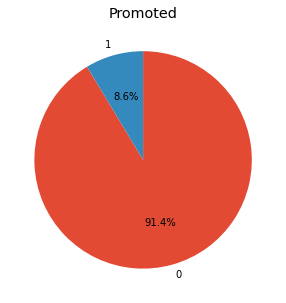

In [17]:
# promotion ratio
plt.figure(figsize=(15,5))

# testing
promoted_counts = target_df.value_counts(sort = False)
plt.pie(promoted_counts, labels = promoted_counts.index, autopct = '%1.1f%%', startangle = 90, counterclock = False)
plt.title("Promoted");

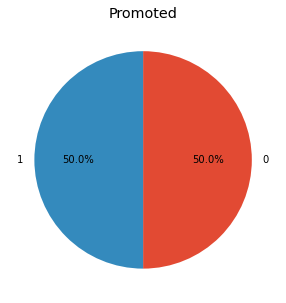

In [18]:
# using SMOTE to handle the imbalnced data
oversampling = SMOTE()
data_df, target_df = oversampling.fit_resample(data_df, target_df)

#testing
plt.figure(figsize=(15,5))
fitted_counts = target_df.value_counts(sort = False)
plt.pie(fitted_counts, labels = fitted_counts.index, autopct = '%1.1f%%', startangle = 90, counterclock = False)
plt.title("Promoted");

In [19]:
# splitting our data into 80 % for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(data_df, target_df, test_size = 0.2, random_state = 42)

### Logistic Regression:

In [20]:
# creating a logistic regression model and applying it to our data
lr_pipe = make_pipeline(StandardScaler(), lr(class_weight = "balanced"))
lr_pipe.fit(X_train, y_train)

# testing 
print("Logistic Regression coefficient of determination R2: {}".format(round(lr_pipe.score(X_test, y_test), 2)))

Logistic Regression coefficient of determination R2: 0.82


In [21]:
# we were trying to inhance the accurracy using Uni variate feature selection techniques but it ended up reducing the accurracy using different k values
# k = 4 reduced the accuracy to 70.49%

'''uni_test = SelectKBest(score_func = f_classif, k = 4)
uni_fit = uni_test.fit(data_df, target_df)

np.set_printoptions(precision = 3)
print("scores of each feature: %s" %uni_fit.scores_)

uni_trans = uni_fit.transform(data_df)
df_f = pd.DataFrame(uni_trans)

uni_f = uni_test.get_support()*data_df.columns
print("selected features: %s" %set(uni_f))'''

scores of each feature: [7.166e+02 3.603e+03 2.129e+02 9.424e+03 2.287e+02 8.529e+03 5.586e+02
 8.712e+03 8.440e+01 6.759e+02 1.405e+03 6.120e+02 4.558e+02 2.324e+02
 3.935e+02 1.333e+03 7.705e+00 1.391e+03 1.087e+03]
selected features: {'', 'trainings', 'KPI_80', 'avg_training_score', 'prev_year_rating'}


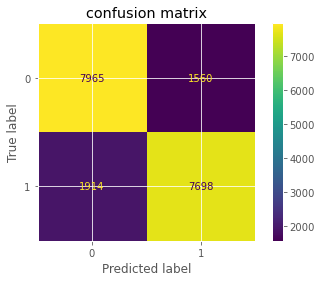

In [22]:
# Confusion matrix
y_pred = lr_pipe.predict(X_test)

metrics.plot_confusion_matrix(lr_pipe, X_test, y_test)
plt.title('confusion matrix');

In [23]:
# classification report summary:
print(metrics.classification_report(y_test, y_pred, target_names = ['not Promoted', 'promoted']))

              precision    recall  f1-score   support

not Promoted       0.81      0.84      0.82      9525
    promoted       0.83      0.80      0.82      9612

    accuracy                           0.82     19137
   macro avg       0.82      0.82      0.82     19137
weighted avg       0.82      0.82      0.82     19137



### RandomForest Tree:

In [24]:
# creating the model and fitting it to the test data
rf_model = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rf_model.fit(X_train, y_train)

# Make predictions for the test set
rf_pred = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy: {}%".format(round(metrics.accuracy_score(y_test, rf_pred)* 100, 2)))

Random Forest Classifier Accuracy: 94.86%


In [25]:
# top features affecting the model
top_features = pd.Series(rf_model.feature_importances_,index = data_df.columns).sort_values(ascending = False)
top_features

avg_training_score              0.271455
prev_year_rating                0.182330
age                             0.117181
KPI_80                          0.090425
experience                      0.076732
gender_m                        0.038189
gender_f                        0.027297
trainings                       0.025370
department_Operations           0.023061
department_Analytics            0.022032
department_Procurement          0.021447
department_Sales & Marketing    0.020869
department_Technology           0.019740
department_Finance              0.013860
education                       0.012372
department_HR                   0.011253
department_Legal                0.010159
department_R&D                  0.010120
awards_won                      0.006108
dtype: float64

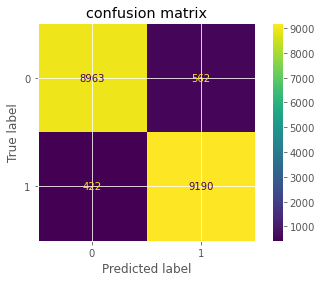

In [26]:
metrics.plot_confusion_matrix(rf_model, X_test, y_test)
plt.title('confusion matrix');

In [27]:
# classification report summary:
print(metrics.classification_report(y_test, rf_pred, target_names = ['not Promoted', 'promoted']))

              precision    recall  f1-score   support

not Promoted       0.96      0.94      0.95      9525
    promoted       0.94      0.96      0.95      9612

    accuracy                           0.95     19137
   macro avg       0.95      0.95      0.95     19137
weighted avg       0.95      0.95      0.95     19137



In [28]:
#readining our goal dataset and preparing it for model

test_df = pd.read_csv('test_data.csv')

#Removing outliers from trainings
trainings_quantile = test_df.trainings.quantile(0.99)
test_df = test_df[(test_df.trainings < trainings_quantile)]

#Removing outliers from trainings
experience_quantile = test_df.experience.quantile(0.97)
test_df = test_df[(test_df.experience < experience_quantile)]

#replacing the nulls in prev_year_rating with median
Imputed_ratings = SimpleImputer(strategy = 'median').fit(test_df[['prev_year_rating']])
test_df.prev_year_rating = Imputed_ratings.transform(test_df[['prev_year_rating']])

#replacing the nulls in education with most frequent value
Imputed_edu = SimpleImputer(strategy = 'most_frequent').fit(test_df[['education']])
test_df.education = Imputed_edu.transform(test_df[['education']])


# encoding categorical variables
dummies_data = pd.get_dummies(test_df[['department', 'gender']])
test_df['education'].replace({"Below Secondary": 1, "Bachelor's": 2, "Master's & above": 3}, inplace = True)

# adding converted columns
test_df = pd.concat([test_df, dummies_data], axis = 'columns')

# droping old categorical columns
test_df.drop(columns = ['id', 'gender', 'department'], inplace = True)

# final touch ✨
clean_train.reset_index(drop = True, inplace = True)

# testing
test_df.head()

,education,trainings,age,prev_year_rating,experience,KPI_80,awards_won,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m
0,2,1,24,3.0,1,1,0,77,0,0,0,0,0,0,0,0,1,0,1
1,2,1,31,3.0,5,0,0,51,0,0,1,0,0,0,0,0,0,1,0
2,2,1,31,1.0,4,0,0,47,0,0,0,0,0,0,0,1,0,0,1
3,2,3,31,2.0,9,0,0,65,0,0,0,0,0,1,0,0,0,1,0
4,2,1,30,4.0,7,0,0,61,0,1,0,0,0,0,0,0,0,0,1


In [29]:
# probability of each individual employee to get promoted
lr_pipe.predict_proba(test_df)

array([[0.425, 0.575],
       [0.974, 0.026],
       [0.963, 0.037],
       ...,
       [0.967, 0.033],
       [0.977, 0.023],
       [0.242, 0.758]])

In [30]:
# using our models in predection 

lr_promoted = pd.Series(lr_pipe.predict(test_df))
rf_promored = pd.Series(rf_model.predict(test_df))

test_df['lr_promoted'] = lr_promoted
test_df['rf_promored'] = rf_promored
test_df.head()

,education,trainings,age,prev_year_rating,experience,KPI_80,awards_won,avg_training_score,department_Analytics,department_Finance,...,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_f,gender_m,lr_promoted,rf_promored
0,2,1,24,3.0,1,1,0,77,0,0,...,0,0,0,0,0,1,0,1,1.0,0.0
1,2,1,31,3.0,5,0,0,51,0,0,...,0,0,0,0,0,0,1,0,0.0,0.0
2,2,1,31,1.0,4,0,0,47,0,0,...,0,0,0,0,1,0,0,1,0.0,0.0
3,2,3,31,2.0,9,0,0,65,0,0,...,0,0,1,0,0,0,1,0,0.0,0.0
4,2,1,30,4.0,7,0,0,61,0,1,...,0,0,0,0,0,0,0,1,0.0,0.0
